In [8]:
from full_pip import *

In [9]:
from full_pip import full_pipeline

In [10]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [11]:
url = "https://raw.githubusercontent.com/GloriaSegurini/xtream-ai-assignment-developer/main/data/diamonds.csv"
diamonds = pd.read_csv(url, delimiter = ",")
diamonds = diamonds[(diamonds.x * diamonds.y * diamonds.z != 0) & (diamonds.price > 0)]
diamonds_processed = diamonds.drop(columns=['depth', 'table', 'y', 'z'])
diamonds_dummy = pd.get_dummies(diamonds_processed, columns=['cut', 'color', 'clarity'], drop_first=True)
x = diamonds_dummy.drop(columns='price')
y = diamonds_dummy.price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
models = [LinearRegression(), SVR(), DecisionTreeRegressor(random_state=0) ]
metrics = [r2_score, mean_absolute_error]
scores_file = 'scores_file_pkl'
weights = [1,2]
metric_tomin = ['mean_absolute_error']
best_model_file = 'best_model_file.pkl'

Training of model LinearRegression **********************
Making predictions of model LinearRegression **********************
Training of model SVR **********************
Making predictions of model SVR **********************
Training of model DecisionTreeRegressor **********************
Making predictions of model DecisionTreeRegressor **********************
Evaluating predictions of model LinearRegression **********************
r2_score: 0.9088
mean_absolute_error: 760.6936
Evaluating predictions of model SVR **********************
r2_score: -0.0467
mean_absolute_error: 2573.5829
Evaluating predictions of model DecisionTreeRegressor **********************
r2_score: 0.904
mean_absolute_error: 555.8074


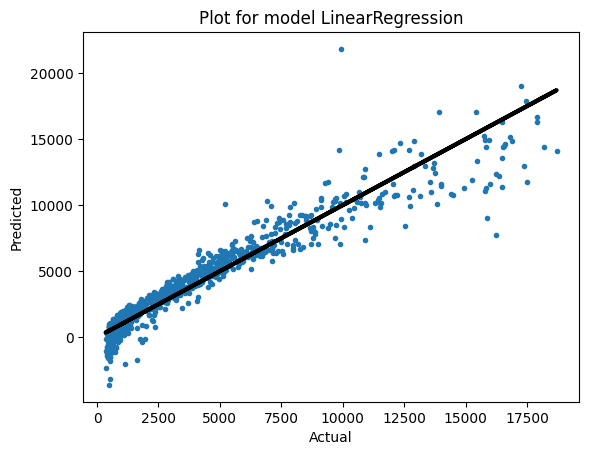

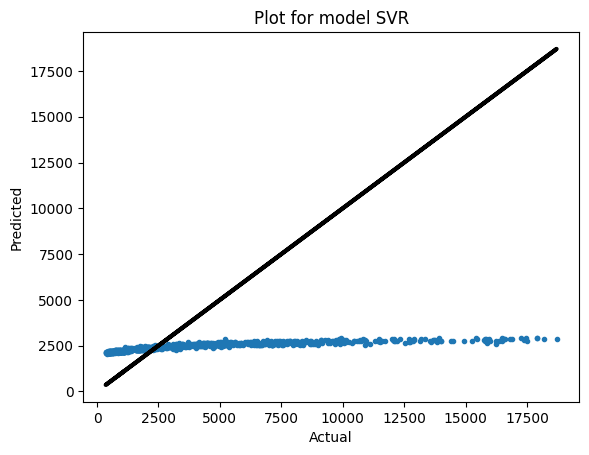

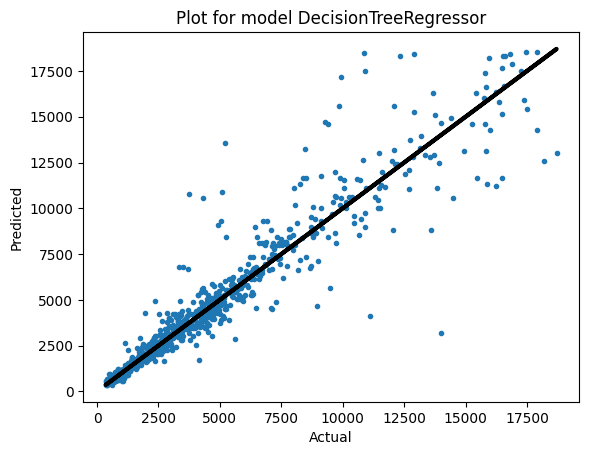

Model LinearRegression predicts negative values!
Training of model LinearRegression **********************
Making predictions of model LinearRegression **********************
Evaluating predictions of model LinearRegression **********************
r2_score: 0.9054
mean_absolute_error: 561.5414


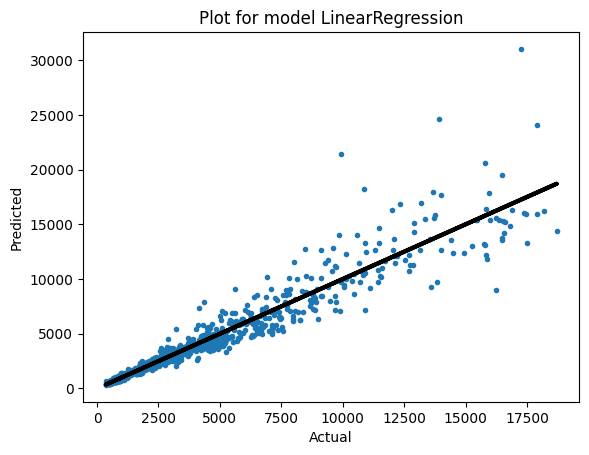

Score for model LinearRegression is 2.7969187355084846
Score for model SVR is 0.0
Score for model DecisionTreeRegressor is 2.9949764521193094
Score for model LinearRegression is 2.990758166992469
Best model is DecisionTreeRegressor with a score of 2.9949764521193094


In [13]:
best_model = full_pipeline(models, x_train, y_train, x_test, metrics, scores_file, y_test, weights, metric_tomin, best_model_file)

In [14]:
with open(best_model_file, 'rb') as file:
    temp = pickle.load(file)
temp

[{'model': {'LinearRegression': {'params': {'copy_X': True,
     'fit_intercept': True,
     'n_jobs': None,
     'positive': False},
    'metrics': {'r2_score': 0.9088, 'mean_absolute_error': 760.6936},
    'fit_model_save': ['LinearRegression_trained_model.pkl'],
    'score': 2.7969187355084846,
    'model_ready_before_fit': LinearRegression()},
   'SVR': {'params': {'C': 1.0,
     'cache_size': 200,
     'coef0': 0.0,
     'degree': 3,
     'epsilon': 0.1,
     'gamma': 'scale',
     'kernel': 'rbf',
     'max_iter': -1,
     'shrinking': True,
     'tol': 0.001,
     'verbose': False},
    'metrics': {'r2_score': -0.0467, 'mean_absolute_error': 2573.5829},
    'fit_model_save': ['SVR_trained_model.pkl'],
    'score': 0.0,
    'model_ready_before_fit': SVR()},
   'DecisionTreeRegressor': {'params': {'ccp_alpha': 0.0,
     'criterion': 'squared_error',
     'max_depth': None,
     'max_features': None,
     'max_leaf_nodes': None,
     'min_impurity_decrease': 0.0,
     'min_samples_